In [1]:
from typing import TypedDict,List,Annotated
from langgraph.graph import END, START, StateGraph
import operator
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

In [2]:
class SimpleState(TypedDict):
    # count: int
    count: Annotated[int,operator.add]
    # summation: int
    summation: Annotated[int,operator.add]
    # tracking_sums: List['names']
    tracking_sums: Annotated[List[int],operator.concat]

In [3]:
def increment(state:SimpleState) -> SimpleState:
    # new_count=state['count'] + 1
    # new_sum=state['summation'] + new_count

    
    return {
        # "count": new_count,
        "count":1,
        # "summation": new_sum,
        "summation": state['count'] + 1,
        # "tracking_sums":state['tracking_sums'] +[new_sum],
        "tracking_sums": [state['count'] + 1]
    }

In [4]:
def should_continue(state:SimpleState):
    if state['count']<5:
        return "continue"
    else:
        return "stop"

In [5]:
graph=StateGraph(state_schema=SimpleState)

In [6]:
graph.add_node(node="increment",action=increment)

In [7]:
graph.set_entry_point(key="increment")

In [8]:
graph.add_conditional_edges(
                 source="increment",
                 path=should_continue,
                 path_map={
                     "continue": "increment",
                     "stop": END
                 }
             )

In [9]:
app=graph.compile()

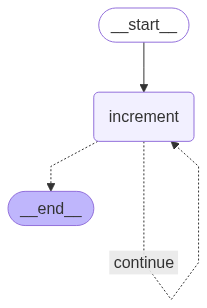

In [10]:
display(Image(data=app.get_graph(xray=True).draw_mermaid_png(max_retries=3)))

In [11]:
state={"count":0,"summation":0,"tracking_sums":[]}

In [13]:
result=app.invoke(input=state)

In [14]:
result

{'count': 5, 'summation': 15, 'tracking_sums': [1, 2, 3, 4, 5]}